In [26]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Fundamentos e Primeiros passos em ML

Machine Learning é uma área da computação que estuda o desenvolvimento de algoritmos que aprendem ou melhoram seu desempenho a partir de dados. Esses algoritmos são utilizados para resolver problemas que não podem ser resolvidos por meio de programação tradicional, como por exemplo, reconhecimento de padrões, classificação de dados, previsão de séries temporais, entre outros.

O aprendizado de máquina é uma subárea da inteligência artificial.

Existem dois tipos clássicos de aprendizado de máquina:

- **Aprendizado supervisionado**: o algoritmo aprende a partir de dados rotulados, ou seja, dados que já possuem a resposta correta. Por exemplo, um algoritmo que aprende a reconhecer imagens de cachorros e gatos a partir de imagens que já estão rotuladas como cachorro ou gato.

    - **Classificação**: o algoritmo aprende a partir de dados rotulados que representam classes. Por exemplo, um algoritmo que aprende a classificar e-mails como spam ou não spam a partir de e-mails que já estão rotulados como spam ou não spam.

    - **Regressão**: o algoritmo aprende a partir de dados rotulados que representam valores contínuos. Por exemplo, um algoritmo que aprende a prever o preço de uma casa a partir de dados rotulados que representam o preço de outras casas.

- **Aprendizado não supervisionado**: o algoritmo aprende a partir de dados não rotulados, ou seja, dados que não possuem a resposta correta. Por exemplo, um algoritmo que aprende a agrupar clientes de um e-commerce a partir de suas características.

    - **Agrupamento**: o algoritmo aprende a partir de dados não rotulados que representam grupos. Por exemplo, um algoritmo que aprende a agrupar clientes de um e-commerce a partir de suas características.

    - **Redução de dimensionalidade**: o algoritmo aprende a partir de dados não rotulados que representam características. Por exemplo, um algoritmo que aprende a reduzir a dimensionalidade de um conjunto de dados a partir de suas características.
    
    - **Regras de associação**: o algoritmo aprende a partir de dados não rotulados que representam itens. Por exemplo, um algoritmo que aprende a recomendar produtos a partir de itens que já foram comprados.

Apesar dessa divisão clássica existe diversas outras técnicas de aprendizado de máquina que não se encaixam nessas categorias, como por exemplo, aprendizado por reforço, ensemble learning, redes neurais artificiais e aprendizado profundo, entre outros.



## Parte 1 e 2 - Importando e manipulando dados

Importando bibliotecas utilizadas

Carregando os dataframes que serão usados na aula

In [4]:
df_excel = pl.read_excel("data/chess.xlsx")
df_csv = pl.read_csv("data/tomato.csv")

Verificando o conteúdo dos dataframes

In [5]:
# Top 5 linhas do dataframe df_excel
df_excel.head()

rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
bool,f64,f64,i64,str,str,str,str,i64,str,i64,str,str,i64
false,1.5042e17,1.5042e17,13,"""outoftime""","""white""","""15+2""","""bourgris""",1500,"""a-00""",1191,"""D10""","""Slav Defense: …",5
true,1.5041e17,1.5041e17,16,"""resign""","""black""","""5+10""","""a-00""",1322,"""skinnerua""",1261,"""B00""","""Nimzowitsch De…",4
true,1.5041e17,1.5041e17,61,"""mate""","""white""","""5+10""","""ischia""",1496,"""a-00""",1500,"""C20""","""King's Pawn Ga…",3
true,1.5041e17,1.5041e17,61,"""mate""","""white""","""20+0""","""daniamurashov""",1439,"""adivanov2009""",1454,"""D02""","""Queen's Pawn G…",3
true,1.5040e17,1.5040e17,95,"""mate""","""white""","""30+3""","""nik221107""",1523,"""adivanov2009""",1469,"""C41""","""Philidor Defen…",5


In [6]:
# Últimas 5 linhas do dataframe df_csv
df_csv.tail()

Date,Unit,Minimum,Maximum,Average,Market
str,str,i64,i64,f64,str
"""2021-05-09""","""Kg""",10,15,12.5,"""Tomato"""
"""2021-05-10""","""Kg""",10,15,12.5,"""Tomato"""
"""2021-05-11""","""Kg""",10,15,12.5,"""Tomato"""
"""2021-05-12""","""Kg""",30,35,32.5,"""Tomato"""
"""2021-05-13""","""Kg""",35,40,37.5,"""Tomato"""


Verificando o "formato" do dataframe: (linhas, colunas)

In [7]:
df_csv.shape

(2741, 6)

Descrevendo os dados contidos no dataframe df_excel

In [8]:
df_excel.describe()

describe,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
str,f64,f64,f64,f64,str,str,str,str,f64,str,f64,str,str,f64
"""count""",20058.0,20058.0,20058.0,20058.0,"""20058""","""20058""","""20058""","""20058""",20058.0,"""20058""",20058.0,"""20058""","""20058""",20058.0
"""null_count""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,"""0""",0.0,"""0""","""0""",0.0
"""mean""",0.805414,6.3213e16,6.3131e16,60.465999,null,null,null,null,1596.631868,null,1588.831987,null,null,4.816981
"""std""",0.395891,7.2923e16,7.2906e16,33.570585,null,null,null,null,291.253376,null,291.036126,null,null,2.797152
"""min""",0.0,1.3768e12,1.3768e12,1.0,"""draw""","""black""","""0+12""","""--jim--""",784.0,"""-0olo0-""",789.0,"""A00""","""Alekhine Defen…",1.0
"""25%""",null,1.4983e12,1.4983e12,37.0,null,null,null,null,1398.0,null,1391.0,null,null,3.0
"""50%""",null,1.5044e12,1.5044e12,55.0,null,null,null,null,1567.0,null,1562.0,null,null,4.0
"""75%""",null,1.4867e17,1.4867e17,79.0,null,null,null,null,1793.0,null,1784.0,null,null,6.0
"""max""",1.0,1.5045e17,1.5045e17,349.0,"""resign""","""white""","""90+8""","""zzzimon""",2700.0,"""zztopillo""",2723.0,"""E98""","""Zukertort Open…",28.0


Uma outra maneira de verificar os tipos das colunas

In [9]:
pl.DataFrame({'col': df_excel.columns, 'type': df_excel.dtypes})

col,type
str,object
"""rated""",Boolean
"""created_at""",Float64
"""last_move_at""",Float64
"""turns""",Int64
"""victory_status…",Utf8
"""winner""",Utf8
"""increment_code…",Utf8
"""white_id""",Utf8
"""white_rating""",Int64


Verificando os dados categóricos da coluna `victory_status`

In [10]:
df_excel.select(
    pl.col('victory_status')
).unique()

victory_status
str
"""mate"""
"""resign"""
"""outoftime"""
"""draw"""


In [11]:
df_excel.select(
    pl.col('victory_status')
).unique().to_series().to_list()

['mate', 'outoftime', 'draw', 'resign']

Contando número de linhas contendo cada uma das categorias

In [12]:
df_excel.select(
    pl.col('victory_status')
).to_series().value_counts()

victory_status,counts
str,u32
"""outoftime""",1680
"""mate""",6325
"""draw""",906
"""resign""",11147


Classificando os tomates de acordo com `Average`

In [13]:
# Função para classificar tomates
def categorizar_tomate_media(avg: float) -> str:
    if avg >= 40 and avg <= 70:
        return 'Tomate Médio'
    elif avg < 40:
        return 'Tomate Pequeno'
    else:
        return 'Tomate Grande'

In [14]:
df_csv_categorizado = (
    df_csv.with_columns(
        pl.col('Average')
            .map_elements(categorizar_tomate_media)
            .alias('Categoria_tomate')
    )
)

Contando quantos tomates foram classificados em cada categoria

In [15]:
(df_csv_categorizado.select(
    pl.col('Categoria_tomate')
)
.to_series()
.value_counts())

Categoria_tomate,counts
str,u32
"""Tomate Grande""",149
"""Tomate Pequeno…",1638
"""Tomate Médio""",954


Descrevendo o comportamento dos "grupos"

In [16]:
df_csv_categorizado.to_pandas().groupby('Categoria_tomate').describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
Categoria_tomate                                                               
Tomate Grande      149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
Tomate Médio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
Tomate Pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
Categoria_tomate                     ...                                   
Tomate Grande      149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
Tomate Médio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
Tomate Pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
Categoria_tomate                                           
Tomate Grande     7.367396  70.5  75.0  77.5  82.5  117.5  
Tomate Médio      8.272792  40.0  45.0  50.0  57.5   70.0  
Tomate Pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

O polars não tem uma maneira "simples" de fazer o describe de um agrupamento. Podemos chegar próximo de um resultado usando o código a seguir:

In [17]:
[x.describe() for _,x in df_csv_categorizado.group_by("Categoria_tomate")]

[shape: (9, 8)
 ┌────────────┬────────────┬──────┬───────────┬───────────┬───────────┬────────┬──────────────────┐
 │ describe   ┆ Date       ┆ Unit ┆ Minimum   ┆ Maximum   ┆ Average   ┆ Market ┆ Categoria_tomate │
 │ ---        ┆ ---        ┆ ---  ┆ ---       ┆ ---       ┆ ---       ┆ ---    ┆ ---              │
 │ str        ┆ str        ┆ str  ┆ f64       ┆ f64       ┆ f64       ┆ str    ┆ str              │
 ╞════════════╪════════════╪══════╪═══════════╪═══════════╪═══════════╪════════╪══════════════════╡
 │ count      ┆ 954        ┆ 954  ┆ 954.0     ┆ 954.0     ┆ 954.0     ┆ 954    ┆ 954              │
 │ null_count ┆ 0          ┆ 0    ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0      ┆ 0                │
 │ mean       ┆ null       ┆ null ┆ 47.818658 ┆ 55.009434 ┆ 51.414046 ┆ null   ┆ null             │
 │ std        ┆ null       ┆ null ┆ 8.203065  ┆ 8.54191   ┆ 8.272792  ┆ null   ┆ null             │
 │ min        ┆ 2013-07-12 ┆ Kg   ┆ 30.0      ┆ 42.0      ┆ 40.0      ┆ Tomato ┆ Toma

Filtrando todos os tomates menores que 40

In [18]:
df_csv_categorizado.filter(
    pl.col('Average') < 40
).describe()

describe,Date,Unit,Minimum,Maximum,Average,Market,Categoria_tomate
str,str,str,f64,f64,f64,str,str
"""count""","""1638""","""1638""",1638.0,1638.0,1638.0,"""1638""","""1638"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,"""0""","""0"""
"""mean""",null,null,23.978022,29.528694,26.753358,null,null
"""std""",null,null,7.175572,7.323327,7.191735,null,null
"""min""","""2013-06-16""","""Kg""",8.0,12.0,10.0,"""Tomato""","""Tomate Pequeno…"
"""25%""",null,null,18.0,25.0,21.5,null,null
"""50%""",null,null,25.0,30.0,27.5,null,null
"""75%""",null,null,30.0,35.0,32.5,null,null
"""max""","""2021-05-13""","""Kg""",38.0,44.0,39.5,"""Tomato""","""Tomate Pequeno…"


## Parte 3 e 4 - Manipulando Arrays com Numpy

In [19]:
arr_list = np.array([0,1,2,3,4,5,6,7,8,9])
arr_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
arr_zeros = np.zeros((4, 6))
arr_zeros

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
arr_ones = np.ones((3, 4))
arr_ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [22]:
arr_random = np.random.rand(3, 4)
arr_random

array([[0.89358746, 0.03085997, 0.89266416, 0.3500653 ],
       [0.1878931 , 0.70249915, 0.79714749, 0.61049615],
       [0.6048085 , 0.87656337, 0.95970061, 0.12863052]])

Em versões mais recentes do numpy uma nova forma de gerar números aleatórios foi implementada.

Ref: [Stackoverflow - np.random.rand vs np.random.random](https://stackoverflow.com/questions/47231852/np-random-rand-vs-np-random-random)

In [23]:
random_gen = np.random.default_rng(42)
arr_random_new = random_gen.random((3, 4))
arr_random_new

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

É possível gerar uma matriz de números aleatórios e definir as margens superiores e inferiores (min e max)

In [24]:
random_gen = np.random.default_rng(42)
arr_random_new = random_gen.uniform(5, 6, size=(3,4))
arr_random_new

array([[5.77395605, 5.43887844, 5.85859792, 5.69736803],
       [5.09417735, 5.97562235, 5.7611397 , 5.78606431],
       [5.12811363, 5.45038594, 5.37079802, 5.92676499]])

In [25]:
arr_random_new.shape

(3, 4)

Podemos alterar o formato do array (sempre preservando o número de elementos)

In [26]:
arr_random_reshape = arr_random_new.reshape(6, 2)
arr_random_reshape

array([[5.77395605, 5.43887844],
       [5.85859792, 5.69736803],
       [5.09417735, 5.97562235],
       [5.7611397 , 5.78606431],
       [5.12811363, 5.45038594],
       [5.37079802, 5.92676499]])

É possível fazer a concatenação de arrays. O Axis igual a 1 irá concatenar os arrays no sentido horizontal e Axis igual a 0 irá concatenar no sentido vertical

In [27]:
arr1 = np.array([[1,2],[3, 4]])
arr2 = np.array([[5,6],[7, 8]])
arr3 = np.array([[9,10],[11, 12]])

arr_concat_h = np.concatenate((arr1, arr2, arr3), axis=1)
arr_concat_h

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [28]:
arr_concat_v = np.concatenate((arr1, arr2, arr3), axis=0)
arr_concat_v

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

Para separar o array podemos usar o método split

In [29]:
arr_split = np.split(arr_concat_h, 2, axis=0)
arr_split

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]

Podemos fazer a transposição dos arrays

In [30]:
print(arr_concat_h)
arr_concat_h.transpose()

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


array([[ 1,  3],
       [ 2,  4],
       [ 5,  7],
       [ 6,  8],
       [ 9, 11],
       [10, 12]])

Podemos usar o "atalho" .T para fazer a transposição

In [31]:
arr_concat_h.T

array([[ 1,  3],
       [ 2,  4],
       [ 5,  7],
       [ 6,  8],
       [ 9, 11],
       [10, 12]])

É possível fazer operações matemáticas com Arrays

In [32]:
arr_a = np.random.randint(0, 10, size=(2, 4))
arr_b = np.random.randint(0, 10, size=(2, 4))

print(f"Array A:\n {arr_a}")
print(f"Array B:\n {arr_b}")

Array A:
 [[9 8 3 1]
 [3 6 0 7]]
Array B:
 [[5 8 7 0]
 [2 4 4 8]]


In [33]:
arr_add = np.add(arr_a, arr_b) # outra opção: arr_a + arr_b
arr_add

array([[14, 16, 10,  1],
       [ 5, 10,  4, 15]])

In [34]:
arr_sub = np.subtract(arr_a, arr_b) # outra opção: arr_a - arr_b
arr_sub

array([[ 4,  0, -4,  1],
       [ 1,  2, -4, -1]])

## Parte 5, 6 e 7 - Gerando gráficos com Matplotlib

In [36]:
df_tomato = df_csv.clone()
df_tomato.head()

Date,Unit,Minimum,Maximum,Average,Market
str,str,i64,i64,f64,str
"""2013-06-16""","""Kg""",26,32,29.0,"""Tomato"""
"""2013-06-17""","""Kg""",20,25,22.5,"""Tomato"""
"""2013-06-18""","""Kg""",22,26,24.0,"""Tomato"""
"""2013-06-19""","""Kg""",24,28,26.0,"""Tomato"""
"""2013-06-20""","""Kg""",22,26,24.0,"""Tomato"""


A coluna Date está no formato de string, precisamos transformalo em Date para criar um gráfico com base nessas datas

In [38]:
df_tomato = (
    df_tomato.select(
        pl.col('Date').cast(pl.Date),
        pl.all().exclude('Date')
    )
)

In [39]:
df_tomato.head()

Date,Unit,Minimum,Maximum,Average,Market
date,str,i64,i64,f64,str
2013-06-16,"""Kg""",26,32,29.0,"""Tomato"""
2013-06-17,"""Kg""",20,25,22.5,"""Tomato"""
2013-06-18,"""Kg""",22,26,24.0,"""Tomato"""
2013-06-19,"""Kg""",24,28,26.0,"""Tomato"""
2013-06-20,"""Kg""",22,26,24.0,"""Tomato"""


Vamos plotar o valor da coluna `Average` ao longo do tempo

Text(0.5, 1.0, 'Peso médio dos tomates ao longo do tempo')

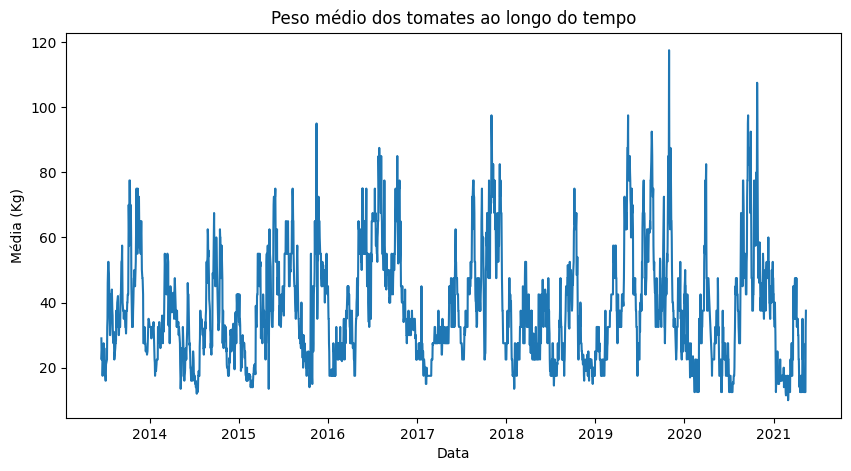

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df_tomato['Date'], df_tomato['Average'])
plt.xlabel('Data')
plt.ylabel('Média (Kg)')
plt.title('Peso médio dos tomates ao longo do tempo')

Podemos fazer um gráfico de dispersão, que é um gráfico comumente usado para verificar a correlação entre duas variáveis

Text(0.5, 1.0, 'Gráfico de dispersão entre black_rating e white_rating')

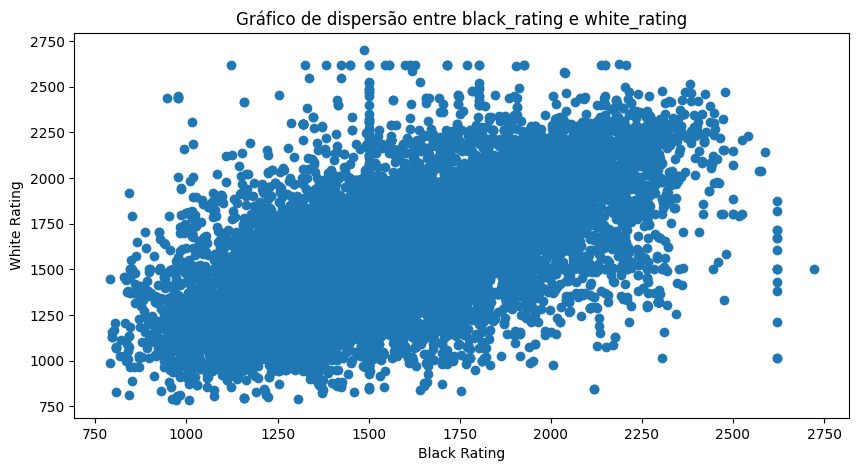

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(df_excel['black_rating'], df_excel['white_rating'])
plt.xlabel('Black Rating')
plt.ylabel('White Rating')
plt.title('Gráfico de dispersão entre black_rating e white_rating')

Outro tipo de gráfico muito usado é o gráfico de barras, que é usado para comparar valores entre diferentes categorias

Text(0.5, 1.0, 'Peso médio dos tomates por categoria')

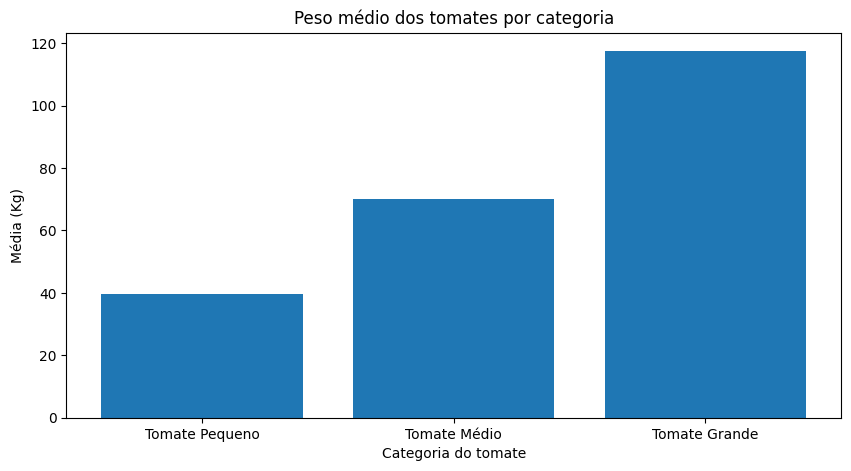

In [52]:
df_tomato = df_csv_categorizado.clone()
plt.figure(figsize=(10, 5))
plt.bar(df_tomato['Categoria_tomate'], df_tomato['Average'])
plt.xlabel('Categoria do tomate')
plt.ylabel('Média (Kg)')
plt.title('Peso médio dos tomates por categoria')

No código acima acabamos criando um gráfico que traz o valor máximo de cata categoria na coluna `Average` (como podemos ver na tabela abaixo e no gráfico gerado para visualizarmos a sobreposição).

Isso acontece por que o matplotlib criará barras separadas para cada categoria repetida. As categorias repetidas serão tratadas como categorias individuais, e as barras correspondentes serão empilhadas umas sobre as outras no mesmo local no gráfico de barras.

shape: (3, 2)
┌──────────────────┬─────────┐
│ Categoria_tomate ┆ Average │
│ ---              ┆ ---     │
│ str              ┆ f64     │
╞══════════════════╪═════════╡
│ Tomate Grande    ┆ 117.5   │
│ Tomate Pequeno   ┆ 39.5    │
│ Tomate Médio     ┆ 70.0    │
└──────────────────┴─────────┘


<BarContainer object of 2741 artists>

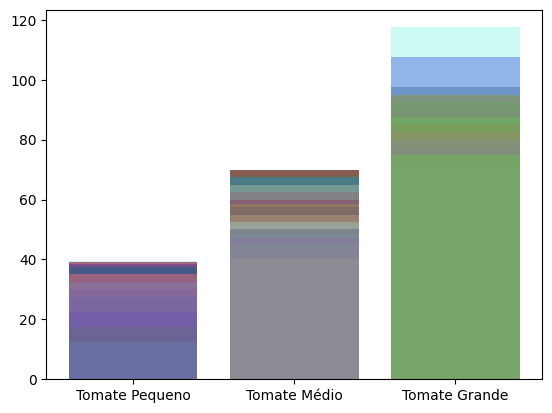

In [85]:
print(df_csv_categorizado.group_by('Categoria_tomate').agg(pl.max('Average')))
cores = [(random.random(), random.random(), random.random(), 0.3) for _ in df_tomato['Categoria_tomate']]
plt.bar(df_tomato['Categoria_tomate'], df_tomato['Average'], color=cores)

Para plotarmos a média da coluna `Average` de cada categoria, precisamos agrupar os dados primeiro

Text(0.5, 1.0, 'Peso médio dos tomates por categoria')

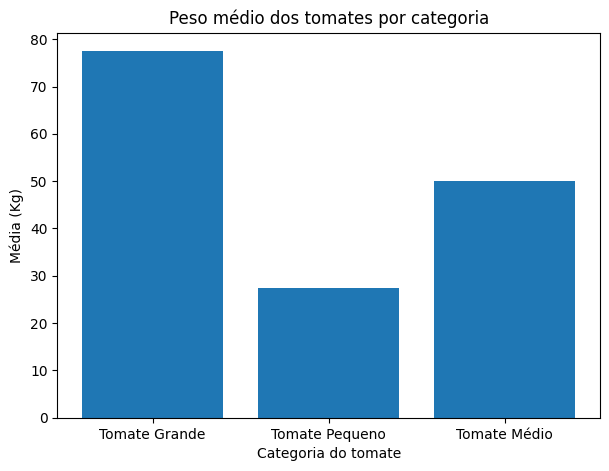

In [87]:
df_aux = df_tomato.group_by('Categoria_tomate').agg(pl.median('Average'))

plt.figure(figsize=(7, 5))
plt.bar(df_aux['Categoria_tomate'], df_aux['Average'])
plt.xlabel('Categoria do tomate')
plt.ylabel('Média (Kg)')
plt.title('Peso médio dos tomates por categoria')

Um gráfico muito usado e que devemos ter cuidado ao usar e interpretar é o gráfico de pizza.

In [88]:
df_chess = df_excel.clone()

Text(0.5, 1.0, 'Média de partidas dentro de status de vitória')

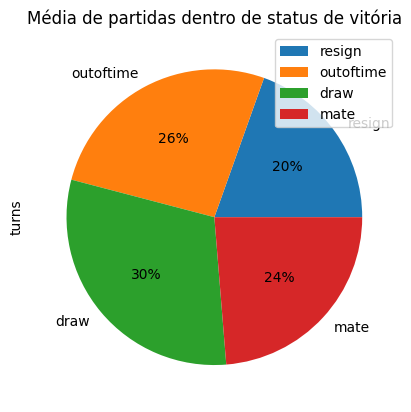

In [104]:
df_chess.group_by('victory_status').agg(pl.mean('turns')).to_pandas().set_index('victory_status').plot(kind='pie', y='turns', autopct="%1.0f%%")
plt.title('Média de partidas dentro de status de vitória')

## Parte 8 e 9 - Criando o primeiro modelo de Machine Learning

In [4]:
df_diabetes = pl.read_csv('data/diabetes.csv')
df_diabetes.head()

Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
i64,i64,i64,i64,i64,f64,f64,i64,i64
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


Para treinar um modelo de machine learning supervisionado precisamos de um conjunto de dados rotulados. As variáveis que contém as características das observações são chamadas de features, variáveis independentes ou variáveis preditoras. A variável que contém o rótulo da observação é chamada de target, variável dependente ou variável resposta.

As features colocaremos na variável X e o target na variável y

In [21]:
X = df_diabetes.select(pl.all().exclude('Class variable'))
y = df_diabetes.select(pl.col('Class variable'))

Agora precisamos dividir os dados em dois: uma parte chamaremos de treino e usaremos para treinar o modelo e a outra parte chamaremos de teste e usaremos para avaliar o modelo após o treino. Isso é feito para avaliarmos o poder de generalização do modelo, ou seja, se o modelo consegue generalizar o que aprendeu com os dados de treino para dados que ele nunca viu antes (representados aqui pelos dados de teste).

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
print(f"Train X {X_train.shape}")
print(f"Test X {X_test.shape}")
print(f"Train y {y_train.shape}")
print(f"Test y {y_test.shape}")

Train X (537, 8)
Test X (231, 8)
Train y (537, 1)
Test y (231, 1)


Para fazer a classificação dos dados iremos usar o algoritmo KNN (K-Nearest Neighbors). Esse algoritmo é um algoritmo de aprendizado supervisionado que pode ser usado tanto para classificação quanto para regressão. Ele classifica as observações baseado na similaridade com as observações vizinhas. A ideia é que observações com características (features) similares devem ter a mesma classe (target).

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.to_numpy().ravel())

KNeighborsClassifier(n_neighbors=3)

Vamos utilizar o método `score` para calcular a acurácia (proporção de classificações corretas) do modelo

In [37]:
acc_train = knn.score(X_train, y_train.to_numpy().ravel())
acc_test = knn.score(X_test, y_test.to_numpy().ravel())

print(f"Acurácia treino: {acc_train*100:.2f}%")
print(f"Acurácia teste: {acc_test*100:.2f}%")


Acurácia treino: 84.36%
Acurácia teste: 67.53%
